In [ ]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


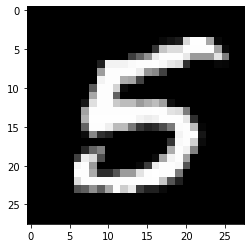

Output : 5


In [ ]:
i = 20000
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f"Output : {y_train[i]}")

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#normalisation of data
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#adding neurons in layers

model = keras.models.Sequential()   
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))   
model.add(keras.layers.Dense(527,activation = 'relu'))  #hidden layers
model.add(keras.layers.Dense(10,activation = 'softmax')) #output layer


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 527)               413695    
                                                                 
 dense_1 (Dense)             (None, 10)                5280      
                                                                 
Total params: 418,975
Trainable params: 418,975
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy']  )

In [ ]:
model.fit(x_train,y_train, epochs = 20) #fitting a neural network model 

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2002 - accuracy: 0.9405
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0805 - accuracy: 0.9755
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0135 - accuracy: 0.9951
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.011

In [ ]:
#creationg model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)  #argmax gives the index of the highest probability 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#predicting values
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9819

In [ ]:
model.save('digit_recog.hdf5')  #saving the model